# Recommender System using SVD & KNN

# Introduction

Topic is movie recommender system. Introduction to what a recommender system is and how the application of Singular Value Decomposition (SVD) can develop multiple kinds of recommender systems. We'll be going over the two popular approaches used in recommender systems to suggest items to users: Collaborative filtering and Content-Based filtering. (Short sentence about literature review notes, references, etc.)

Data set we are using called MovieLens using the 100k movie ratings data set..

# Algorithm

## SVD and its applications

# Method

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
overall_stats = pd.read_csv('/data/ml-100k/u.info', header=None)
print("Details of users, items and ratings involved in the loaded movielens dataset: ",list(overall_stats[0]))

Details of users, items and ratings involved in the loaded movielens dataset:  ['943 users', '1682 items', '100000 ratings']


In [5]:
## same item id is same as movie id, item id column is renamed as movie id
column_names1 = ['user id','movie id','rating','timestamp']
dataset = pd.read_csv('/data/ml-100k/u.data', sep='\t',header=None,names=column_names1)
dataset.head() 

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
len(dataset), max(dataset['movie id']),min(dataset['movie id'])

(100000, 1682, 1)

In [7]:
d = 'movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western'
column_names2 = d.split(' | ')
column_names2

['movie id',
 'movie title',
 'release date',
 'video release date',
 'IMDb URL',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [8]:
items_dataset = pd.read_csv('/data/ml-100k/u.item', sep='|',header=None,names=column_names2,encoding='latin-1')
items_dataset

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
movie_dataset = items_dataset[['movie id','movie title']]
movie_dataset.head()

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


## Here we're looking at length of original items_dataset and length of unique combination of rows in items_dataset after removing movie id column

In [10]:
len(items_dataset.groupby(by=column_names2[1:])),len(items_dataset)

(1664, 1682)

## Merge Datasets

In [11]:
merged_dataset = pd.merge(dataset, movie_dataset, how='inner', on='movie id')
merged_dataset

,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


A dataset is created from the existing merged dataset by grouping the unique user id and movie title combination and the ratings by a user to the same movie in different instances (timestamps) are averaged and stored in the new dataset.

## Final refined dataset

In [12]:
refined_dataset = merged_dataset.groupby(by=['user id','movie title'], as_index=False).agg({"rating":"mean"})

refined_dataset.head()

,user id,movie title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0


In [13]:
#list of all users
unique_users = refined_dataset['user id'].unique() 
#creating a list of all movie names in it
unique_movies = refined_dataset['movie title'].unique()
len(unique_movies),len(unique_users)

(1664, 943)

In [14]:
users_list = refined_dataset['user id'].tolist()
movie_list = refined_dataset['movie title'].tolist()
len(users_list),len(movie_list)

(99693, 99693)

In [15]:
ratings_list = refined_dataset['rating'].tolist()
print(ratings_list)
len(ratings_list)

[2.0, 5.0, 3.0, 4.0, 3.0, 3.0, 1.0, 4.0, 4.0, 5.0, 5.0, 1.0, 5.0, 4.0, 5.0, 3.0, 4.0, 2.0, 4.0, 4.0, 1.0, 5.0, 2.0, 3.0, 1.0, 1.0, 1.0, 3.0, 2.0, 3.0, 5.0, 2.0, 4.0, 5.0, 4.0, 5.0, 3.0, 4.0, 5.0, 1.0, 5.0, 4.0, 4.0, 3.0, 3.0, 3.0, 4.0, 5.0, 5.0, 4.0, 4.0, 5.0, 3.0, 3.0, 5.0, 3.0, 3.0, 4.0, 5.0, 5.0, 1.0, 3.0, 5.0, 5.0, 5.0, 4.0, 2.0, 4.0, 4.0, 3.0, 2.0, 4.0, 5.0, 2.0, 5.0, 4.0, 5.0, 1.0, 3.0, 4.0, 5.0, 1.0, 3.0, 4.0, 4.0, 3.0, 1.0, 3.0, 4.0, 3.0, 1.0, 1.0, 5.0, 4.0, 3.0, 4.0, 3.0, 5.0, 5.0, 1.0, 3.0, 2.0, 4.0, 5.0, 4.0, 3.0, 4.0, 3.0, 5.0, 4.0, 5.0, 3.0, 4.0, 5.0, 5.0, 2.0, 5.0, 2.0, 1.0, 5.0, 5.0, 4.0, 5.0, 4.0, 3.0, 3.0, 4.0, 4.0, 4.0, 5.0, 2.0, 2.0, 1.0, 5.0, 3.0, 5.0, 5.0, 1.0, 4.0, 2.0, 4.0, 3.0, 5.0, 3.0, 2.0, 3.0, 3.0, 2.0, 4.0, 5.0, 5.0, 4.0, 3.0, 5.0, 4.0, 5.0, 2.0, 3.0, 4.0, 5.0, 5.0, 5.0, 3.0, 3.0, 1.0, 2.0, 5.0, 2.0, 3.0, 3.0, 5.0, 1.0, 5.0, 4.0, 1.0, 3.0, 3.0, 3.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, 2.0, 5.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 3.0, 5.0, 4.0, 5.0, 4.0, 3.0, 5.0, 4.0,

99693

## Create a dictionary to map movie name to its index in the movie names list

In [16]:
movies_dict = {unique_movies[i] : i for i in range(len(unique_movies))}
print(movies_dict)
print(len(movies_dict))

{'101 Dalmatians (1996)': 0, '12 Angry Men (1957)': 1, '20,000 Leagues Under the Sea (1954)': 2, '2001: A Space Odyssey (1968)': 3, 'Abyss, The (1989)': 4, 'Ace Ventura: Pet Detective (1994)': 5, 'Air Bud (1997)': 6, 'Akira (1988)': 7, 'Aladdin (1992)': 8, 'Alien (1979)': 9, 'Aliens (1986)': 10, 'All Dogs Go to Heaven 2 (1996)': 11, 'Amadeus (1984)': 12, 'Angels and Insects (1995)': 13, "Antonia's Line (1995)": 14, 'Apocalypse Now (1979)': 15, 'Apollo 13 (1995)': 16, 'Aristocats, The (1970)': 17, 'Army of Darkness (1993)': 18, 'Austin Powers: International Man of Mystery (1997)': 19, 'Babe (1995)': 20, 'Back to the Future (1985)': 21, 'Bad Boys (1995)': 22, 'Basic Instinct (1992)': 23, 'Batman & Robin (1997)': 24, 'Batman Forever (1995)': 25, 'Batman Returns (1992)': 26, 'Beavis and Butt-head Do America (1996)': 27, 'Bedknobs and Broomsticks (1971)': 28, 'Belle de jour (1967)': 29, 'Big Night (1996)': 30, 'Billy Madison (1995)': 31, 'Birdcage, The (1996)': 32, 'Blade Runner (1982)': 33

In [17]:
## creating a utility matrix for the available data

## Creating an empty array with (number of rows = number of movies) and (number of columns = number of users) rows as movies, columns as users

utility_matrix = np.asarray([[np.nan for j in range(len(unique_users))] for i in range(len(unique_movies))])
print("Shape of Utility matrix: ",utility_matrix.shape)

for i in range(len(ratings_list)):

  ## ith entry in users list and subtract 1 to get the index, we do the same for movies but we already defined a dictionary to get the index.
  utility_matrix[movies_dict[movie_list[i]]][users_list[i]-1] = ratings_list[i]

utility_matrix

Shape of Utility matrix:  (1664, 943)


array([[ 2., nan, nan, ..., nan, nan, nan],
       [ 5., nan, nan, ..., nan, nan, nan],
       [ 3., nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [18]:
mask = np.isnan(utility_matrix)
masked_arr = np.ma.masked_array(utility_matrix, mask)
temp_mask = masked_arr.T
rating_means = np.mean(temp_mask, axis=0)

filled_matrix = temp_mask.filled(rating_means)
filled_matrix = filled_matrix.T
filled_matrix = filled_matrix - rating_means.data[:,np.newaxis]

filled_matrix = filled_matrix.T / np.sqrt(len(movies_dict)-1)
filled_matrix

array([[-0.02227217,  0.01608636, -0.01226094, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

Compute SVD of utility matrix

In [19]:
U, S, V = np.linalg.svd(filled_matrix)

In [20]:
case_insensitive_movies_list = [i.lower() for i in unique_movies]

In [21]:
#Function to calculate the cosine similarity (sorting by most similar and returning the top N)
def top_cosine_similarity(data, movie_id, top_n=10):
  index = movie_id
  movie_row = data[index, :]
  magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data))
  similarity = np.dot(movie_row, data.T) / (magnitude[index] * magnitude)
  sort_indexes = np.argsort(-similarity)
  return sort_indexes[:top_n+1]

In [22]:
#k-principal components to represent movies, movie_id to find recommendations, top_n print n results        
def get_similar_movies(movie_name,top_n,k = 50):
  # k = 50
  # movie_id = 1
  # top_n = 10
  
  sliced = V.T[:, :k] # representative data
  movie_id = movies_dict[movie_name]
  indexes = top_cosine_similarity(sliced, movie_id, top_n)
  print(" ")
  print("Top",top_n,"movies which are very much similar to the Movie-",movie_name, "are: ")
  print(" ")
  for i in indexes[1:]:
    print(unique_movies[i])

In [23]:
# function which takes input and returns suggestions for the user

def get_possible_movies(movie):

    temp = ''
    possible_movies = case_insensitive_movies_list.copy()
    for i in movie :
      out = []
      temp += i
      for j in possible_movies:
        if temp in j:
          out.append(j)
      if len(out) == 0:
          return possible_movies
      out.sort()
      possible_movies = out.copy()

    return possible_movies

In [24]:
class invalid(Exception):
    pass

def recommender():
    
    try:

      movie_name = input("Enter the Movie name: ")
      movie_name_lower = movie_name.lower()
      if movie_name_lower not in case_insensitive_movies_list :
        raise invalid
      else :
        # movies_list[case_insensitive_country_names.index(movie_name_lower)]
        num_recom = int(input("Enter Number of movie recommendations needed: "))
        get_similar_movies(unique_movies[case_insensitive_movies_list.index(movie_name_lower)],num_recom)

    except invalid:

      possible_movies = get_possible_movies(movie_name_lower)

      if len(possible_movies) == len(unique_movies) :
        print("Movie name entered is does not exist in the list ")
      else :
        indices = [case_insensitive_movies_list.index(i) for i in possible_movies]
        print("Entered Movie name is not matching with any movie from the dataset . Please check the below suggestions :\n",[unique_movies[i] for i in indices])
        print("")
        recommender()

In [27]:
recommender()

Enter the Movie name: Back to the Future (1985)
Enter Number of movie recommendations needed: 15
 
Top 15 movies which are very much similar to the Movie- Back to the Future (1985) are: 
 
Speed (1994)
Pather Panchali (1955)
Indiana Jones and the Last Crusade (1989)
Terminator 2: Judgment Day (1991)
Dead Man Walking (1995)
Raiders of the Lost Ark (1981)
Parent Trap, The (1961)
Emma (1996)
Blues Brothers, The (1980)
Doors, The (1991)
Sting, The (1973)
No Escape (1994)
Stargate (1994)
Dark City (1998)
Terminator, The (1984)


C:\Users\xxxdk\AppData\Local\Temp\ipykernel_21408\3187410774.py:6: RuntimeWarning: invalid value encountered in true_divide
  similarity = np.dot(movie_row, data.T) / (magnitude[index] * magnitude)


### Here we utilize scikit-learn to obtain our NearestNeighbors functionality.

In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [29]:
# num_users = len(refined_dataset.rating.unique())
# num_items = len(refined_dataset.movieId.unique())
num_users = len(refined_dataset['user id'].value_counts())
num_items = len(refined_dataset['movie title'].value_counts())
print('Unique number of users in the dataset: {}'.format(num_users))
print('Unique number of movies in the dataset: {}'.format(num_items))


Unique number of users in the dataset: 943
Unique number of movies in the dataset: 1664


In [30]:
rating_count_df = pd.DataFrame(refined_dataset.groupby(['rating']).size(), columns=['count'])
rating_count_df

,count
rating,
1.0,6083
1.5,3
2.0,11334
2.5,6
3.0,27060
3.5,19
4.0,34042
4.5,16
5.0,21130


Text(0, 0.5, 'number of ratings')

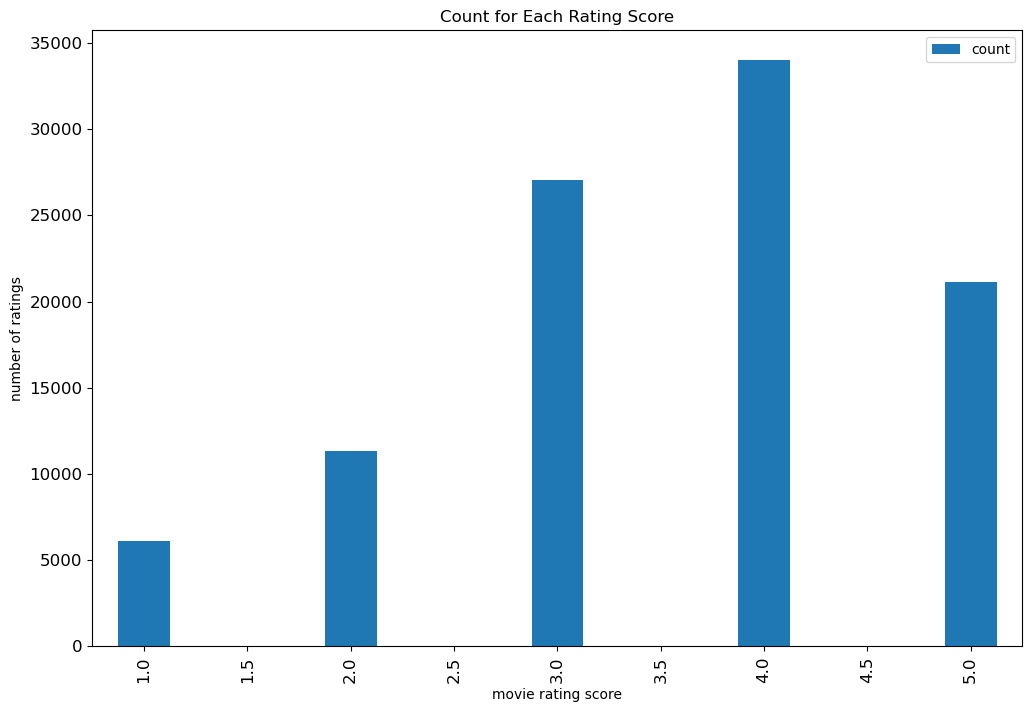

In [31]:
ax = rating_count_df.reset_index().rename(columns={'index': 'rating score'}).plot('rating','count', 'bar',
    figsize=(12, 8),
    title='Count for Each Rating Score',
    fontsize=12)

ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")

In [32]:
total_count = num_items * num_users
zero_count = total_count-refined_dataset.shape[0]
zero_count

1469459

In [33]:
# append counts of zero rating to df_ratings_cnt
rating_count_df = rating_count_df.append(
    pd.DataFrame({'count': zero_count}, index=[0.0]),
    verify_integrity=True,
).sort_index()
rating_count_df

C:\Users\xxxdk\AppData\Local\Temp\ipykernel_21408\3047448168.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rating_count_df = rating_count_df.append(


,count
0.0,1469459
1.0,6083
1.5,3
2.0,11334
2.5,6
3.0,27060
3.5,19
4.0,34042
4.5,16
5.0,21130


In [34]:
# add log count
rating_count_df['log_count'] = np.log(rating_count_df['count'])
rating_count_df

,count,log_count
0.0,1469459,14.200405
1.0,6083,8.713253
1.5,3,1.098612
2.0,11334,9.335562
2.5,6,1.791759
3.0,27060,10.205812
3.5,19,2.944439
4.0,34042,10.435350
4.5,16,2.772589
5.0,21130,9.958449


In [35]:
rating_count_df = rating_count_df.reset_index().rename(columns={'index': 'rating score'})
rating_count_df

,rating score,count,log_count
0,0.0,1469459,14.200405
1,1.0,6083,8.713253
2,1.5,3,1.098612
3,2.0,11334,9.335562
4,2.5,6,1.791759
5,3.0,27060,10.205812
6,3.5,19,2.944439
7,4.0,34042,10.435350
8,4.5,16,2.772589
9,5.0,21130,9.958449


Text(0, 0.5, 'number of ratings')

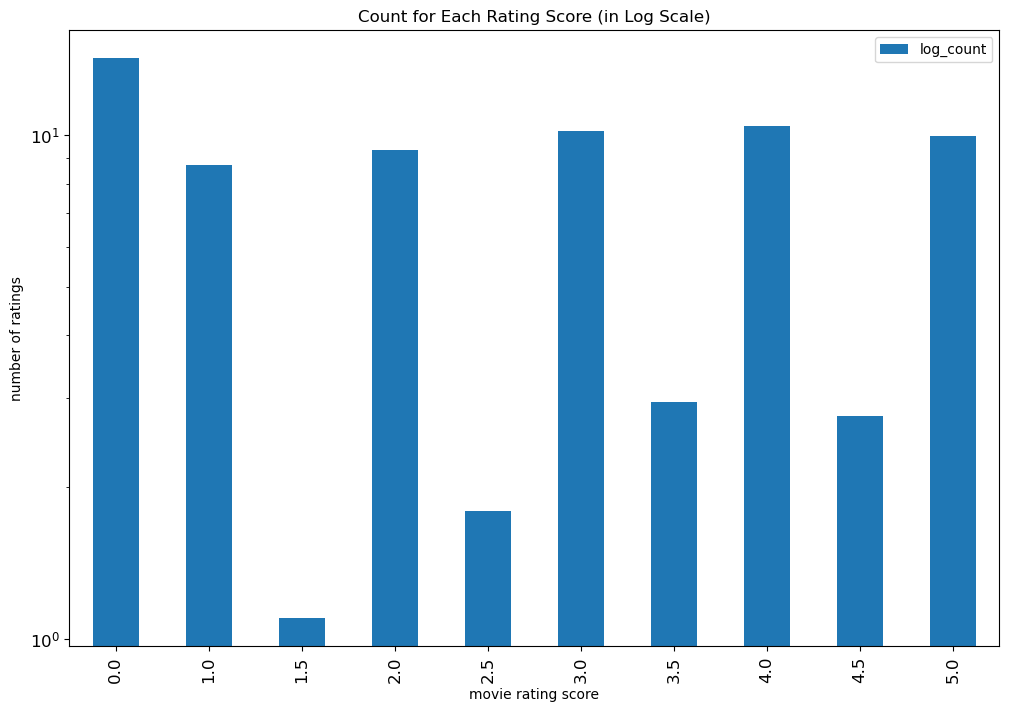

In [36]:
ax = rating_count_df.plot('rating score', 'log_count', 'bar', figsize=(12, 8),
    title='Count for Each Rating Score (in Log Scale)',
    logy=True,
    fontsize=12,)

ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")

In [37]:
refined_dataset.head()

,user id,movie title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0


In [38]:
# get rating frequency
movies_count_df = pd.DataFrame(refined_dataset.groupby('movie title').size(), columns=['count'])
movies_count_df.head()

,count
movie title,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41


Text(0, 0.5, 'number of ratings')

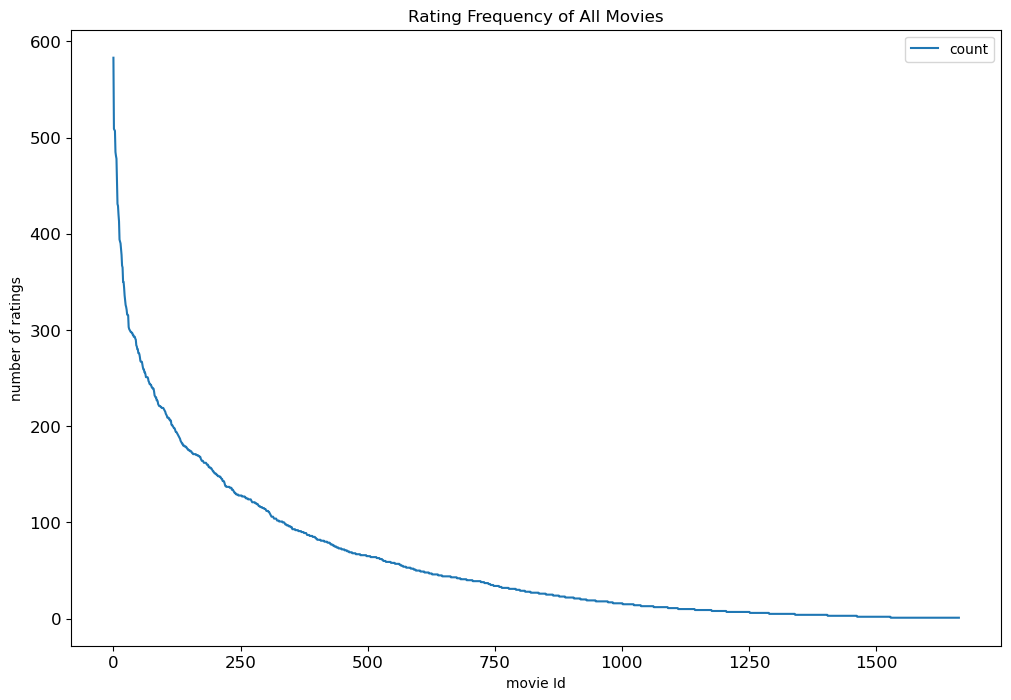

In [39]:
# plot rating frequency of all movies
ax = movies_count_df \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of All Movies',
        fontsize=12
    )
ax.set_xlabel("movie Id")
ax.set_ylabel("number of ratings")

In [40]:
# pivot and create movie-user matrix
movie_to_user_df = refined_dataset.pivot(
     index='movie title',
   columns='user id',
      values='rating').fillna(0)

movie_to_user_df.head()

user id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-900 (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),5.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187 (1997),0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# transform matrix to scipy sparse matrix
movie_to_user_sparse_df = csr_matrix(movie_to_user_df.values)
movie_to_user_sparse_df

<1664x943 sparse matrix of type '<class 'numpy.float64'>'
	with 99693 stored elements in Compressed Sparse Row format>

In [42]:
movies_list = list(movie_to_user_df.index)
movies_list[:10]

["'Til There Was You (1997)",
 '1-900 (1994)',
 '101 Dalmatians (1996)',
 '12 Angry Men (1957)',
 '187 (1997)',
 '2 Days in the Valley (1996)',
 '20,000 Leagues Under the Sea (1954)',
 '2001: A Space Odyssey (1968)',
 '3 Ninjas: High Noon At Mega Mountain (1998)',
 '39 Steps, The (1935)']

In [43]:
movie_dict = {movie : index for index, movie in enumerate(movies_list)}
print(movie_dict)

{"'Til There Was You (1997)": 0, '1-900 (1994)': 1, '101 Dalmatians (1996)': 2, '12 Angry Men (1957)': 3, '187 (1997)': 4, '2 Days in the Valley (1996)': 5, '20,000 Leagues Under the Sea (1954)': 6, '2001: A Space Odyssey (1968)': 7, '3 Ninjas: High Noon At Mega Mountain (1998)': 8, '39 Steps, The (1935)': 9, '8 1/2 (1963)': 10, '8 Heads in a Duffel Bag (1997)': 11, '8 Seconds (1994)': 12, 'A Chef in Love (1996)': 13, 'Above the Rim (1994)': 14, 'Absolute Power (1997)': 15, 'Abyss, The (1989)': 16, 'Ace Ventura: Pet Detective (1994)': 17, 'Ace Ventura: When Nature Calls (1995)': 18, 'Across the Sea of Time (1995)': 19, 'Addams Family Values (1993)': 20, 'Addicted to Love (1997)': 21, 'Addiction, The (1995)': 22, 'Adventures of Pinocchio, The (1996)': 23, 'Adventures of Priscilla, Queen of the Desert, The (1994)': 24, 'Adventures of Robin Hood, The (1938)': 25, 'Affair to Remember, An (1957)': 26, 'African Queen, The (1951)': 27, 'Afterglow (1997)': 28, 'Age of Innocence, The (1993)': 2

In [44]:
case_insensitive_movies_list = [i.lower() for i in movies_list]

In [45]:
knn_movie_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_movie_model.fit(movie_to_user_sparse_df)

NearestNeighbors(algorithm='brute', metric='cosine')

In [46]:
## function to find top 'n' similar movies of the given input 
def get_similar_movies(movie, n = 10):
  ## inputs for the function are the movie and number of top similar movies you want.
  index = movie_dict[movie]
  knn_input = np.asarray([movie_to_user_df.values[index]])
  n = min(len(movies_list)-1,n)
  distances, indices = knn_movie_model.kneighbors(knn_input, n_neighbors=n+1)
  
  print("Top",n,"movies which are very much similar to the Movie-",movie, "are: ")
  print(" ")
  for i in range(1,len(distances[0])):
    print(movies_list[indices[0][i]])

In [47]:
from pprint import pprint
movie_name = '101 Dalmatians (1996)'

get_similar_movies(movie_name,15)

Top 15 movies which are very much similar to the Movie- 101 Dalmatians (1996) are: 
 
Jack (1996)
Twister (1996)
Willy Wonka and the Chocolate Factory (1971)
Independence Day (ID4) (1996)
Toy Story (1995)
Father of the Bride Part II (1995)
Hunchback of Notre Dame, The (1996)
Lion King, The (1994)
Mrs. Doubtfire (1993)
Jungle Book, The (1994)
Grumpier Old Men (1995)
Mission: Impossible (1996)
Mr. Holland's Opus (1995)
Homeward Bound II: Lost in San Francisco (1996)
Dragonheart (1996)


In [48]:
# function which takes user input and returns movie suggestions/alternates for the user

def get_possible_movies(movie):

    temp = ''
    possible_movies = case_insensitive_movies_list.copy()
    for i in movie :
      out = []
      temp += i
      for j in possible_movies:
        if temp in j:
          out.append(j)
      if len(out) == 0:
          return possible_movies
      out.sort()
      possible_movies = out.copy()

    return possible_movies

In [49]:
class invalid(Exception):
    pass

def spell_correction():
    
    try:

      movie_name = input("Enter the Movie name: ")
      movie_name_lower = movie_name.lower()
      if movie_name_lower not in case_insensitive_movies_list :
        raise invalid
      else :
        num_recom = int(input("Enter Number of movie recommendations needed: "))
        get_similar_movies(movies_list[case_insensitive_movies_list.index(movie_name_lower)],num_recom)

    except invalid:

      possible_movies = get_possible_movies(movie_name_lower)

      if len(possible_movies) == len(movies_list) :
        print("Movie name entered is does not exist in the list ")
      else :
        indices = [case_insensitive_movies_list.index(i) for i in possible_movies]
        print("Entered Movie name is not matching with any movie from the dataset . Please check the below suggestions :\n",[movies_list[i] for i in indices])
        spell_correction()


In [50]:
spell_correction()

Enter the Movie name: Back to the Future (1985)
Enter Number of movie recommendations needed: 15
Top 15 movies which are very much similar to the Movie- Back to the Future (1985) are: 
 
Indiana Jones and the Last Crusade (1989)
Raiders of the Lost Ark (1981)
Empire Strikes Back, The (1980)
Groundhog Day (1993)
Monty Python and the Holy Grail (1974)
Forrest Gump (1994)
E.T. the Extra-Terrestrial (1982)
Terminator, The (1984)
When Harry Met Sally... (1989)
Pulp Fiction (1994)
Jurassic Park (1993)
Princess Bride, The (1987)
Blues Brothers, The (1980)
Apollo 13 (1995)
Fugitive, The (1993)


In [51]:
# compute total number of entries in the movie-user matrix
num_entries = movie_to_user_df.shape[0] * movie_to_user_df.shape[1]
# compute total number of entries with zero values
num_zeros = (movie_to_user_df==0).sum(axis=1).sum()
# calculate the ratio of 'zeros' to 'entries'
ratio_zeros = num_zeros / num_entries
print('There are about {:.2%} of ratings in our data thats missing'.format(ratio_zeros))

There are about 93.65% of ratings in our data thats missing
